## Import libraries

In [78]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

## Load in the train and test dataset

In [79]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


### NaNN detection

In [80]:
train.isnull().sum().sum()

0

In [81]:
test.isnull().sum().sum()

0

### Mapping some features 

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

full_data = [train, test]
for dataset in full_data:
    dataset['City Group'] = dataset['City Group'].map( {'Big Cities': 0, 'Other': 1} ).astype(int)
    dataset['Type'] = dataset['Type'].map( {'FC': 0, 'IL': 1, 'DT': 2, 'MB': 3} ).astype(int)
    dataset['Open Date'] = dataset['Open Date'].str.split('/').str[2]
    
#train = train.sort_values(by='Open Date')
#test.sort_values(by='OpenDate')
train.head(5)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,İstanbul,0,1,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008,Ankara,0,0,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013,Diyarbakır,1,1,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012,Tokat,1,1,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009,Gaziantep,1,1,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


### Visualisation Open Date with Revenue

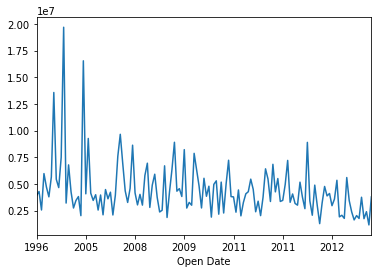

In [83]:
train = train.sort_values(by='Open Date')
train.set_index('Open Date')['revenue'].plot()

## Feature selection

In [84]:
drop_elements = ['City','Id']
train = train.drop(drop_elements, axis = 1)
test = test.drop(drop_elements, axis = 1)
train['Open Date'] = train['Open Date'].astype(float)
test['Open Date'] = test['Open Date'].astype(float)

In [85]:
drop_elements = ['P1','P7','P8','P9','P10','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P24','P25','P27','P30','P31','P32','P33','P34','P35','P36','P37']
train = train.drop(drop_elements, axis = 1)
test = test.drop(drop_elements, axis = 1)

In [86]:
train.head(5)

,Open Date,City Group,Type,P2,P3,P4,P5,P6,P11,P22,P23,P26,P28,P29,revenue
35,1996.0,1,1,5.0,4.0,3.0,1,2,5,3,5,3.0,3.0,2.0,3903884.0
122,1997.0,0,1,7.5,6.0,7.5,2,8,10,5,15,10.0,12.5,2.5,4286645.0
64,1998.0,0,1,7.5,6.0,6.0,2,8,4,3,5,12.5,5.0,7.5,2551252.0
83,1998.0,0,1,4.0,4.0,4.0,2,5,3,2,1,5.0,2.0,3.0,5966193.0
28,1998.0,0,1,5.0,4.0,4.0,1,3,2,4,3,4.0,4.0,2.0,4705945.0


In [87]:
test.head(5)

,Open Date,City Group,Type,P2,P3,P4,P5,P6,P11,P22,P23,P26,P28,P29
0,2011.0,1,0,4.0,4.0,4.0,1,2,5,1,4,0.0,2.0,3.0
1,2011.0,1,1,4.0,4.0,4.0,2,2,2,2,1,0.0,1.0,3.0
2,2013.0,0,0,4.0,4.0,4.0,2,2,4,5,5,0.0,2.0,3.0
3,2013.0,1,1,4.0,4.0,4.0,2,3,3,2,2,0.0,2.0,3.0
4,2013.0,1,0,4.0,4.0,4.0,1,2,3,1,1,0.0,5.0,3.0


## Visualisations

### Heatmap

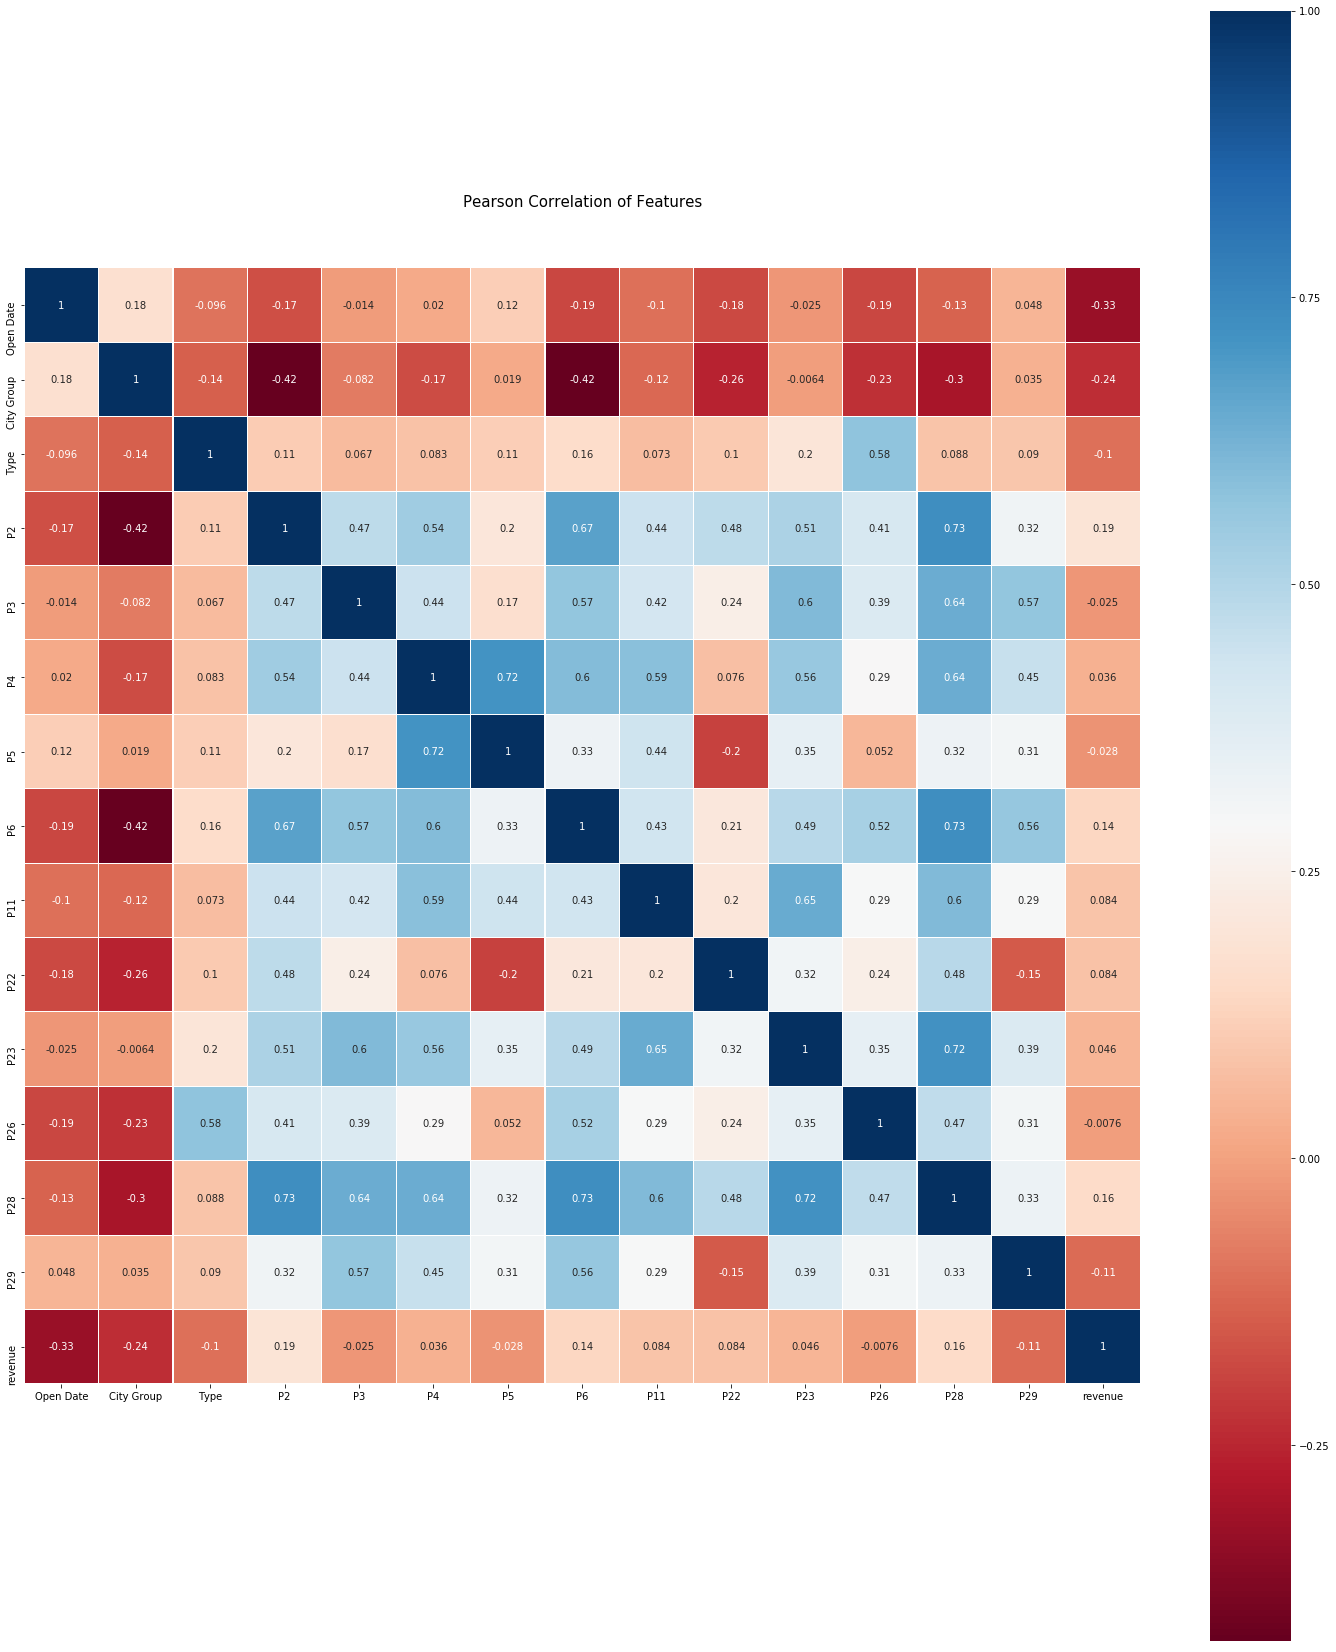

In [88]:
colormap = plt.cm.RdBu
plt.figure(figsize=(25,30))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Pairplots (doesn't work)

## Generating our Base First-Level Models

### Creating NumPy arrays out of our train and test sets

In [89]:
y_train = train['revenue'].ravel()
train = train.drop(['revenue'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

In [90]:
train.head(5)

,Open Date,City Group,Type,P2,P3,P4,P5,P6,P11,P22,P23,P26,P28,P29
35,1996.0,1,1,5.0,4.0,3.0,1,2,5,3,5,3.0,3.0,2.0
122,1997.0,0,1,7.5,6.0,7.5,2,8,10,5,15,10.0,12.5,2.5
64,1998.0,0,1,7.5,6.0,6.0,2,8,4,3,5,12.5,5.0,7.5
83,1998.0,0,1,4.0,4.0,4.0,2,5,3,2,1,5.0,2.0,3.0
28,1998.0,0,1,5.0,4.0,4.0,1,3,2,4,3,4.0,4.0,2.0


In [91]:
test.head(5)

,Open Date,City Group,Type,P2,P3,P4,P5,P6,P11,P22,P23,P26,P28,P29
0,2011.0,1,0,4.0,4.0,4.0,1,2,5,1,4,0.0,2.0,3.0
1,2011.0,1,1,4.0,4.0,4.0,2,2,2,2,1,0.0,1.0,3.0
2,2013.0,0,0,4.0,4.0,4.0,2,2,4,5,5,0.0,2.0,3.0
3,2013.0,1,1,4.0,4.0,4.0,2,3,3,2,2,0.0,2.0,3.0
4,2013.0,1,0,4.0,4.0,4.0,1,2,3,1,1,0.0,5.0,3.0


### Realisation SVR(Support Vector Regression or SVM)

### Linear kernel

In [92]:
clf = SVR(kernel="linear")
clf.fit(x_train, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [93]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
selector = RFE(clf, 5, step=1)
selector = selector.fit(x_train, y_train)
selector.support_ 

array([ True, False, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False], dtype=bool)

In [94]:
selector.ranking_

array([ 1,  5, 10,  1,  6,  7,  9,  1,  3,  4,  1,  2,  1,  8])

### Cross-validation

In [109]:
X_train, X_test, Y_train, y_test = train_test_split(train.values, y_train, test_size=0.25, random_state=0,  shuffle=True)

print('Shape of train after slit:', X_train.shape, Y_train.shape)
print('Shape of test:', X_test.shape, y_test.shape)

clf = SVR(kernel='linear').fit(X_train, Y_train)
print('Score:', -clf.score(X_test, y_test)*100,'%')                          

Shape of train after slit: (102, 14) (102,)
Shape of test: (35, 14) (35,)
Score: 8.17227935186 %


### KFold cross-validation

In [108]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(train)

print(kf)  

for train_index, test_index in kf.split(train):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    clf = SVR(kernel='linear').fit(X_train, Y_train)
    print('SCORE:', -clf.score(X_test, Y_test)*100, '%')  


KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  19  20
  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  60  61  63  64  65  66  67  68  69  70  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  89  91  92  93  94  96  97  98  99 100 101
 102 103 104 105 106 107 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136]
TEST: [  4  17  18  31  37  59  62  71  72  88  90  95 108 109]
SCORE: 50.3100304218 %
TRAIN: [  0   2   3   4   5   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  29  30  31  32  33  34  36  37  38  39  40
  41  42  43  44  45  46  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  67  69  70  71  72  73  74  75  76  77  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  9

### RBF kernel

In [97]:
clf = SVR(kernel="rbf")
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
selector = RFE(clf, 5, step=1)
selector = selector.fit(x_train, y_train)
selector.support_ 

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [42]:
selector.ranking_

AttributeError: 'RFE' object has no attribute 'ranking_'

## Cross-validation

In [110]:
X_train, X_test, Y_train, y_test = train_test_split(train.values, y_train, test_size=0.25, random_state=0,  shuffle=True)

print('Shape of train after slit:', X_train.shape, Y_train.shape)
print('Shape of test:', X_test.shape, y_test.shape)

clf = SVR(kernel='rbf').fit(X_train, Y_train)
print('Score:', -clf.score(X_test, y_test)*100,'%') 

Shape of train after slit: (102, 14) (102,)
Shape of test: (35, 14) (35,)
Score: 8.18189911448 %


### KFold cross-validation

In [111]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(train)

print(kf)  

for train_index, test_index in kf.split(train):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    clf = SVR(kernel='rbf').fit(X_train, Y_train)
    print('SCORE:',-clf.score(X_test, Y_test)*100, '%')  


KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [  0   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  26  27  28  30  32  33  34  35  36  37  38  40
  41  42  43  44  45  46  47  48  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  77  79
  80  81  82  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 112 113 114 115 116 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 134 135]
TEST: [  3  20  29  31  39  49  76  78  83 110 111 117 133 136]
SCORE: 4.40405222476 %
TRAIN: [  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  52  53  54  55  56  58  59
  60  61  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78
  79  81  82  83  86  87  88  89  90  92  93  94  95  9

## Realisation Ridge

In [112]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=10.0)
clf.fit(x_train, y_train) 

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [113]:
selector = RFE(clf, 5, step=1)
selector = selector.fit(x_train, y_train)
selector.support_ 

array([False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False,  True], dtype=bool)

In [114]:
selector.ranking_

array([ 2,  1,  1,  1,  3,  5,  8,  7, 10,  1,  9,  6,  4,  1])

### Cross-validation

In [115]:
X_train, X_test, Y_train, y_test = train_test_split(train.values, y_train, test_size=0.25, random_state=0,  shuffle=True)

print('Shape of train after slit:', X_train.shape, Y_train.shape)
print('Shape of test:', X_test.shape, y_test.shape)

clf = Ridge(alpha=10.0).fit(X_train, Y_train)
print('Score:', clf.score(X_test, y_test)*100,'%')

Shape of train after slit: (102, 14) (102,)
Shape of test: (35, 14) (35,)
Score: 20.1665259294 %


### RidgeCV for right alpha value

In [105]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 10.0, 1.0], gcv_mode='auto')
reg.fit(x_train, y_train)       

reg.alpha_                                      

10.0

### KFold cross-validation

In [106]:
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(train)

print(kf)  

for train_index, test_index in kf.split(train):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    clf = Ridge(alpha=10.0).fit(X_train, Y_train)
    print('SCORE:', -clf.score(X_test, Y_test)*100, '%')  


KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36
  37  38  39  41  43  44  45  47  48  49  50  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  75  76  78
  79  80  81  82  83  85  86  87  88  89  91  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 118
 119 121 122 123 124 125 126 127 129 130 131 132 133 135 136]
TEST: [ 32  40  42  46  51  74  77  84  90  92 117 120 128 134]
SCORE: 118.554258357 %
TRAIN: [  0   1   2   3   5   6   7   8  10  12  13  15  16  17  18  19  21  22
  23  24  26  27  28  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  49  50  51  52  53  54  56  57  58  59  60  61  62
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  9

## Main predicting of revenue

In [131]:
test = test.values
clf = Ridge(alpha=10.0)
clf.fit(x_train, y_train) 
revenue = clf.predict(test)
print(revenue)

[ 4213413.39614803  3203653.20592445  3187347.8914848  ...,
  3727998.06633264  4760140.63306689  4781924.36680353]


In [141]:
answer = {'Predicted revenue': revenue}
submission = pd.DataFrame(data = answer)
submission

,Predicted revenue
0,4.213413e+06
1,3.203653e+06
2,3.187348e+06
3,3.133723e+06
4,4.207463e+06
5,4.862128e+06
6,3.736476e+06
7,4.730649e+06
8,5.120914e+06
9,3.968604e+06


In [143]:
submission.to_csv('Submission_restaurant_revenue.csv')